# สอนXarray เบื้องต้นข้อมูลอุณหภูมิ

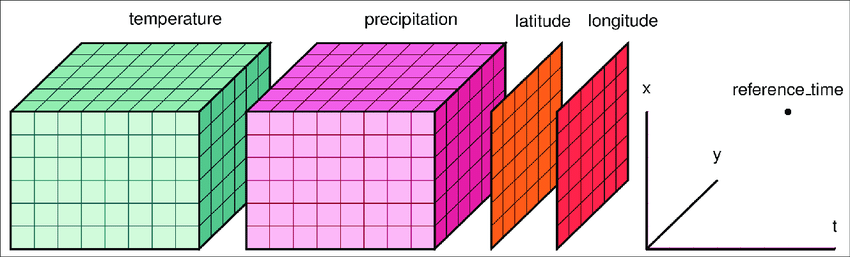

Xarray เป็นไพธอนแพคเกจที่ใช้งจัดการข้อมูลอาเรย์หลายมิติ ซึ่งข้อมูลทางด้านภูมิอากาศวิทยาเป็นแบบอาเรย์หลายมิติ ตัวแพจเกจสร้างขึ้นบนพื้นฐานของ Numpyที่จัดการข้อมูลอาเรย์ได้ดี และ pandas ที่จัดการข้อมูลในลักษณะ dataframe หรือ spreadsheet  ส่วนการพลอตข้อมูลกราฟหรือแผนที่ดึงความสามารถของ Cartopy มาใช้งาน

นิสิตจะได้เรียนรู้
* 1.การเปิดข้อมูล netcdf
* 2.ทำความเข้าใจโครงสร้างข้อมูล
* 3.การใช้งาน xarray เบื้องต้น
* 4.การเลือกกริดจากข้อมูล netcdf

โค้ดนำมาจากติวเตอร์เรียล https://www.guillaumedueymes.com/courses/tutorial_python_netcdf/4-xarray_library/#1--open-a-netcdf-file


#### แนะนำแหล่งเรียนรู้เพิ่มเติม
1.การเรียน cartopy https://www.guillaumedueymes.com/courses/tutorial_python_netcdf/3-cartopy_library/
2.การใช้งานข้อมูล netcdf https://www.guillaumedueymes.com/courses/tutorial_python_netcdf/1-netcdf_tutorial/


### ก่อนเรียนไฟล์นี้ต้องผ่านยูทูป
* วีดีโอที่ 003-007 ซึ่งเป็นยูทูปสอน metpy https://www.youtube.com/watch?v=lFq53ViZA1M&list=PL2e-NEAjUyLE23az8n-yGN5MbWju8MNVk
    * เรื่อง Numpy, Matplotlib และ Cartopy
    


# 1. เปิดข้อมูล netcdf
โค้ด https://www.guillaumedueymes.com/courses/tutorial_python_netcdf/4-xarray_library/#1--open-a-netcdf-file

สูตรการแปลงพิกัด 0-360 เป็น -180w-180E http://vikas-ke-funde.blogspot.com/2010/06/convert-longitude-0-360-to-180-to-180.html

In [1]:
import xarray as xr
import warnings; warnings.filterwarnings(action='ignore')
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)

In [129]:
# อุณหภูมิสูงสุดรายวัน ดาวน์โหลดจาก https://psl.noaa.gov/data/gridded/data.cpc.globaltemp.html
# นิสิตสามารถเลือกดาวน์โหลดข้อมูลอุณหภูมิแบบอื่นได้จาก https://psl.noaa.gov/data/gridded/tables/temperature.html
tmax2003_DIR = './1data/tmax.2003_cpc.nc'
tmax = xr.open_dataset(tmax2003_DIR)
tmax

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 365)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 2003-01-01 2003-01-02 ... 2003-12-31
Data variables:
    tmax     (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    version:        V1.0
    history:        created 9/2016 by CAS NOAA/ESRL PSD
    title:          CPC GLOBAL TEMP V1.0
    dataset_title:  CPC GLOBAL TEMP
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/wd52ws/global_temp/
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globaltemp...

In [130]:
# หาอุณหภูมิเฉลี่ยรายวันได้จากนำ tmax+tmin แล้วมาหารสอง ตามเอกสาร https://psl.noaa.gov/data/gridded/data.cpc.globaltemp.html
DS_new = tmax

In [5]:
DS_new

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 365)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 2003-01-01 2003-01-02 ... 2003-12-31
Data variables:
    tmax     (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    version:        V1.0
    history:        created 9/2016 by CAS NOAA/ESRL PSD
    title:          CPC GLOBAL TEMP V1.0
    dataset_title:  CPC GLOBAL TEMP
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/wd52ws/global_temp/
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globaltemp...

# 2. ตรวจดูข้อมูลใน dataset
โค้ด https://www.guillaumedueymes.com/courses/tutorial_python_netcdf/4-xarray_library/#2--exploring-the-data

สามารถตรวจสอบข้อมูล datasets ของเราด้วยเมธอดจาก xarray ได้ดังนี้

* DS.var
* DS.dims
* DS.coords
* DS.attrs

In [6]:
DS_new.var


<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 365)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 2003-01-01 2003-01-02 ... 2003-12-31
Data variables:
    tmax     (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    version:        V1.0
    history:        created 9/2016 by CAS NOAA/ESRL PSD
    title:          CPC GLOBAL TEMP V1.0
    dataset_title:  CPC GLOBAL TEMP
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/wd52ws/global_temp/
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globaltemp...>

In [7]:
DS_new.dims

Frozen({'lat': 360, 'lon': 720, 'time': 365})

In [8]:
DS_new.coords

Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 2003-01-01 2003-01-02 ... 2003-12-31

In [9]:
DS_new.attrs

{'Conventions': 'CF-1.0',
 'version': 'V1.0',
 'history': 'created 9/2016 by CAS NOAA/ESRL PSD',
 'title': 'CPC GLOBAL TEMP V1.0',
 'dataset_title': 'CPC GLOBAL TEMP',
 'Source': 'ftp://ftp.cpc.ncep.noaa.gov/precip/wd52ws/global_temp/',
 'References': 'https://www.psl.noaa.gov/data/gridded/data.cpc.globaltemp.html'}

# 3- การใช้งานคำสั่่งเบื้องต้น Xarray

โค้ด https://www.guillaumedueymes.com/courses/tutorial_python_netcdf/4-xarray_library/#3--basic-operations-with-xarray

## เลือกวันเวลา

In [10]:
DS_date = DS_new.sel(time='2003-08-01')
DS_date

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
    time     datetime64[ns] 2003-08-01
Data variables:
    tmax     (lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    version:        V1.0
    history:        created 9/2016 by CAS NOAA/ESRL PSD
    title:          CPC GLOBAL TEMP V1.0
    dataset_title:  CPC GLOBAL TEMP
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/wd52ws/global_temp/
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globaltemp...

## เลือกช่วงเวลา time range


In [11]:
DS_date_range = DS_new.sel(time=slice('2003-08-01', '2003-08-31'))
DS_date_range

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 31)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 2003-08-01 2003-08-02 ... 2003-08-31
Data variables:
    tmax     (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    version:        V1.0
    history:        created 9/2016 by CAS NOAA/ESRL PSD
    title:          CPC GLOBAL TEMP V1.0
    dataset_title:  CPC GLOBAL TEMP
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/wd52ws/global_temp/
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globaltemp...

## ส่งออกข้อมูลให้เป็นแบบ spreadsheet หรือ dataframe

In [12]:
df = DS_date_range.to_dataframe()

In [13]:
df.head()

tmax
lat   lon  time            
89.75 0.25 2003-08-01   NaN
           2003-08-02   NaN
           2003-08-03   NaN
           2003-08-04   NaN
           2003-08-05   NaN

In [14]:
df.describe()

,tmax
count,2.136086e+06
mean,2.318605e+01
std,1.062879e+01
min,-1.639690e+01
25%,1.628415e+01
50%,2.486326e+01
75%,3.101172e+01
max,5.047318e+01


## หาค่าเฉลี่ยเชิงห้วงเวลา Time mean


In [15]:
Mean_array = DS_date_range.mean(dim='time')
Mean_array.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:  (lat: 360, lon: 720)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
Data variables:
    tmax     (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan>

## บันทึกผลลัพธ์ในรูปของ csv ฟอร์แมท


In [16]:
Mean_array.tmax.to_dataframe().to_csv('./2outp/CPC_Tmax_mean.csv')

## หาค่าเฉลี่ยของกริดในแนวละติจูดและลองจิจูด


In [17]:
DS_date_range.tmax.mean(dim=('lat', 'lon'))

<xarray.DataArray 'tmax' (time: 31)>
array([24.058712, 23.956247, 24.050928, 24.11399 , 24.080816, 24.199091,
       24.120241, 24.039633, 23.410524, 23.266031, 23.257727, 23.358967,
       23.404058, 23.220074, 23.571833, 23.432873, 23.498133, 23.3896  ,
       23.110415, 22.759184, 22.675508, 22.792974, 22.521347, 22.466328,
       22.526033, 22.2002  , 22.447893, 22.371675, 22.242668, 22.138031,
       22.085474], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2003-08-01 2003-08-02 ... 2003-08-31

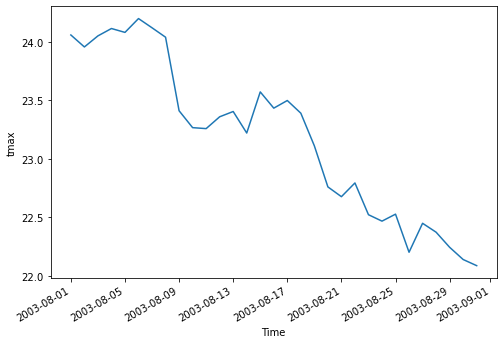

In [18]:
DS_date_range.tmax.mean(dim=('lat', 'lon')).plot()

## บันทึกข้อมูลเป็น csv ฟอร์แมท:


In [19]:
DS_date_range.tmax.mean(dim=('time', 'lon')).to_dataframe().to_csv('./2outp/CPC_Tmax_2Dmean.csv')


## พลอตแผนที่อย่างง่ายด้วย Xarray


In [20]:
Mean_array.tmax

<xarray.DataArray 'tmax' (lat: 360, lon: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8

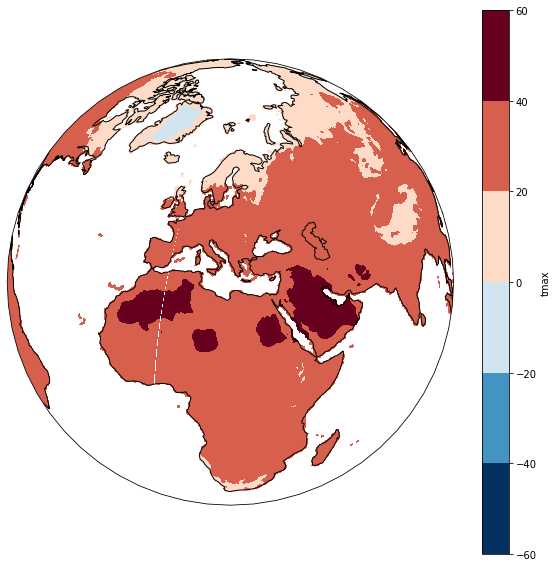

In [21]:
import cartopy.crs as ccrs
fig=plt.figure(figsize=(10,10), frameon=True) 

ax = plt.axes(projection=ccrs.Orthographic(20, 35))
Mean_array.tmax.plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_global(); ax.coastlines();

## วิธีการคำนวณด้วยการยุบรวมแบบ Groupby() 



In [22]:
DS_new

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 365)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 2003-01-01 2003-01-02 ... 2003-12-31
Data variables:
    tmax     (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    version:        V1.0
    history:        created 9/2016 by CAS NOAA/ESRL PSD
    title:          CPC GLOBAL TEMP V1.0
    dataset_title:  CPC GLOBAL TEMP
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/wd52ws/global_temp/
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globaltemp...

In [23]:
# หาค่าเฉลี่ยรายเดือน monthly mean:
DS_month = DS_new.groupby('time.month').mean('time')
DS_month

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, month: 12)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    tmax     (month, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [24]:
# หาค่าเฉลี่ยรายฤดูกาล season mean:
DS_season = DS_new.groupby('time.season').mean('time')
DS_season

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, season: 4)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    tmax     (season, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

## เลือกข้อมูลแบบรายฤดูกาล
เราสามารถเลือกข้อมูลให้ด้วยการดึงออกมาเป็นรายฤดูกาลได้ จากข้อมูลอุณหภูมิที่เป็นแบบรายวัน

In [143]:
DS_winter = DS_season.sel(season='DJF') # เลือกฤดูหนาวเดือน ธันวาคม มกราคมและกุมภาพันธ์
DS_winter

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
    season   <U3 'DJF'
Data variables:
    tmax     (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

## รวมข้อมูลรายฤดูกาล คำนวณค่าเฉลี่ยและทำการพลอตแผนที่รายฤดูกาล

Text(0.5, 1.02, 'Seasonal Surface Air Temperature')

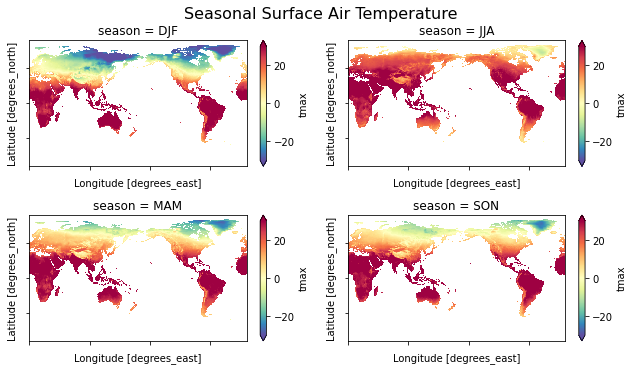

In [26]:
DS_Season = DS_new.tmax.groupby('time.season').mean('time')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9,5))
j = 0
for i, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    if season =='JJA':
        j += 1
        i = 0
    elif season =='SON':
        i = 1
        
    DS_Season.sel(season=season).plot.pcolormesh(
        ax=axes[i, j], vmin=-30, vmax=30, cmap='Spectral_r',
        add_colorbar=True, extend='both')

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')
   
plt.tight_layout()
fig.suptitle('Seasonal Surface Air Temperature', fontsize=16, y=1.02)

## เซฟข้อมูลผลลัพธ์ในรูปแบบ Netcdf:



In [27]:
DS_season = DS_new.groupby('time.season').mean('time')
dataDIR = './2outp/CPC_tmax_season.nc'
DS_Season.to_netcdf(dataDIR)

# 4- การเลือกข้อมูลจุดกริดจาก Netcdf file โดยใช้ Xarray

## สกัดค่ากริดที่ใกล้ที่สุดตามพิกัดที่ต้องการในแนว a latitude / longitude:


In [28]:
lati = 46.50
loni = 2.2
data  = DS_new.sel(lon=loni  , lat=lati  , method='nearest') 
data

<xarray.Dataset>
Dimensions:  (time: 365)
Coordinates:
    lat      float32 46.75
    lon      float32 2.25
  * time     (time) datetime64[ns] 2003-01-01 2003-01-02 ... 2003-12-31
Data variables:
    tmax     (time) float32 ...
Attributes:
    Conventions:    CF-1.0
    version:        V1.0
    history:        created 9/2016 by CAS NOAA/ESRL PSD
    title:          CPC GLOBAL TEMP V1.0
    dataset_title:  CPC GLOBAL TEMP
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/wd52ws/global_temp/
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globaltemp...

In [29]:
data['tmax']

<xarray.DataArray 'tmax' (time: 365)>
array([12.644995, 14.792612, 11.84376 , ...,  3.421305,  3.718559,  2.860205],
      dtype=float32)
Coordinates:
    lat      float32 46.75
    lon      float32 2.25
  * time     (time) datetime64[ns] 2003-01-01 2003-01-02 ... 2003-12-31
Attributes:
    level_desc:    Surface
    parent_stat:   Other
    long_name:     Daily Maximum Temperature
    cell_methods:  time: mean
    valid_range:   [-90.  50.]
    avg_period:    0000-00-01 00:00:00
    dataset:       CPC Global Temperature
    comments:      GTS data and is gridded using the Shepard Algorithm
    max_period:    6z to 6z
    actual_range:  [-60.637543  23.253231]
    units:         degC
    var_desc:      Maximum Temperature
    statistic:     Maximum

## แปลงค่าไปเป็น dataframe แล้วทำการพลอตกราฟ

<AxesSubplot:xlabel='time'>

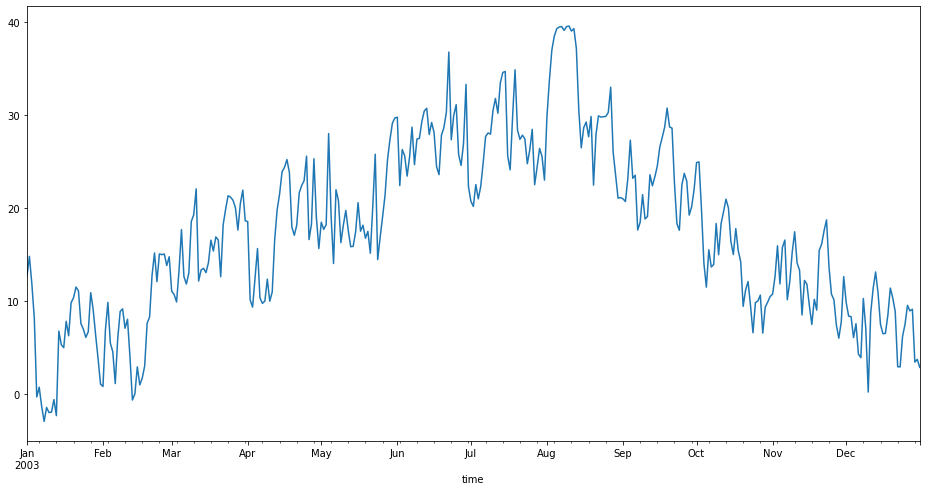

In [30]:
df = data.tmax.to_dataframe()
fig = plt.figure(figsize=(16,8))
df['tmax'].plot()

## สกัดค่ากริดด้วยชุดพิกัดของจุดกริดที่ต้องการ


In [77]:
lats =  [15.0,25.0,35.0]
lons =  [60.0,100.0,115.0]

data  = DS_new.sel(lon=lons  , lat=lats  , method='nearest')

In [78]:
data

<xarray.Dataset>
Dimensions:  (lat: 3, lon: 3, time: 365)
Coordinates:
  * lat      (lat) float32 15.25 25.25 35.25
  * lon      (lon) float32 60.25 100.2 115.2
  * time     (time) datetime64[ns] 2003-01-01 2003-01-02 ... 2003-12-31
Data variables:
    tmax     (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    version:        V1.0
    history:        created 9/2016 by CAS NOAA/ESRL PSD
    title:          CPC GLOBAL TEMP V1.0
    dataset_title:  CPC GLOBAL TEMP
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/wd52ws/global_temp/
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globaltemp...

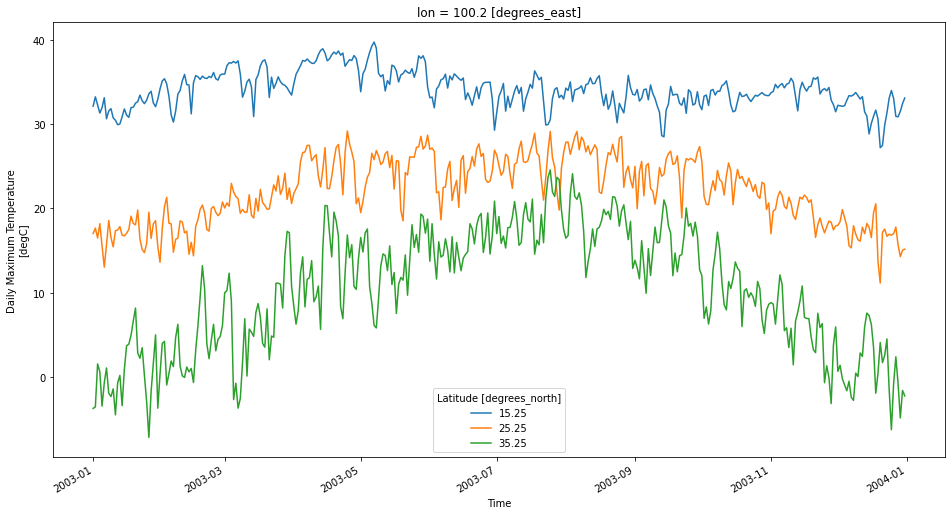

In [80]:
fig = plt.figure(figsize=(16,8))
data.tmax.sel(lon=100.25, lat=[ 15.25, 25.25, 35.25]).plot.line(x='time')

## สกัดค่าพื้นที่ขนาดเล็กหรือโดเมนที่ต้องการด้วยการใช้ slicing ตามแนวละติจูดและลองจิจูด



In [136]:
# กำหนดค่าพิกัดตรงนี้
lat_bnd = [30, 0] # 30N-0
lon_bnd = [80, 120]
area = DS_new.sel(lon=slice(*lon_bnd), lat=slice(*lat_bnd),)
area

<xarray.Dataset>
Dimensions:  (lat: 60, lon: 80, time: 365)
Coordinates:
  * lat      (lat) float32 29.75 29.25 28.75 28.25 27.75 ... 1.75 1.25 0.75 0.25
  * lon      (lon) float32 80.25 80.75 81.25 81.75 ... 118.2 118.8 119.2 119.8
  * time     (time) datetime64[ns] 2003-01-01 2003-01-02 ... 2003-12-31
Data variables:
    tmax     (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    version:        V1.0
    history:        created 9/2016 by CAS NOAA/ESRL PSD
    title:          CPC GLOBAL TEMP V1.0
    dataset_title:  CPC GLOBAL TEMP
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/wd52ws/global_temp/
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globaltemp...

In [137]:
area.lon.values


array([ 80.25,  80.75,  81.25,  81.75,  82.25,  82.75,  83.25,  83.75,
        84.25,  84.75,  85.25,  85.75,  86.25,  86.75,  87.25,  87.75,
        88.25,  88.75,  89.25,  89.75,  90.25,  90.75,  91.25,  91.75,
        92.25,  92.75,  93.25,  93.75,  94.25,  94.75,  95.25,  95.75,
        96.25,  96.75,  97.25,  97.75,  98.25,  98.75,  99.25,  99.75,
       100.25, 100.75, 101.25, 101.75, 102.25, 102.75, 103.25, 103.75,
       104.25, 104.75, 105.25, 105.75, 106.25, 106.75, 107.25, 107.75,
       108.25, 108.75, 109.25, 109.75, 110.25, 110.75, 111.25, 111.75,
       112.25, 112.75, 113.25, 113.75, 114.25, 114.75, 115.25, 115.75,
       116.25, 116.75, 117.25, 117.75, 118.25, 118.75, 119.25, 119.75],
      dtype=float32)

พลอตแผนที่



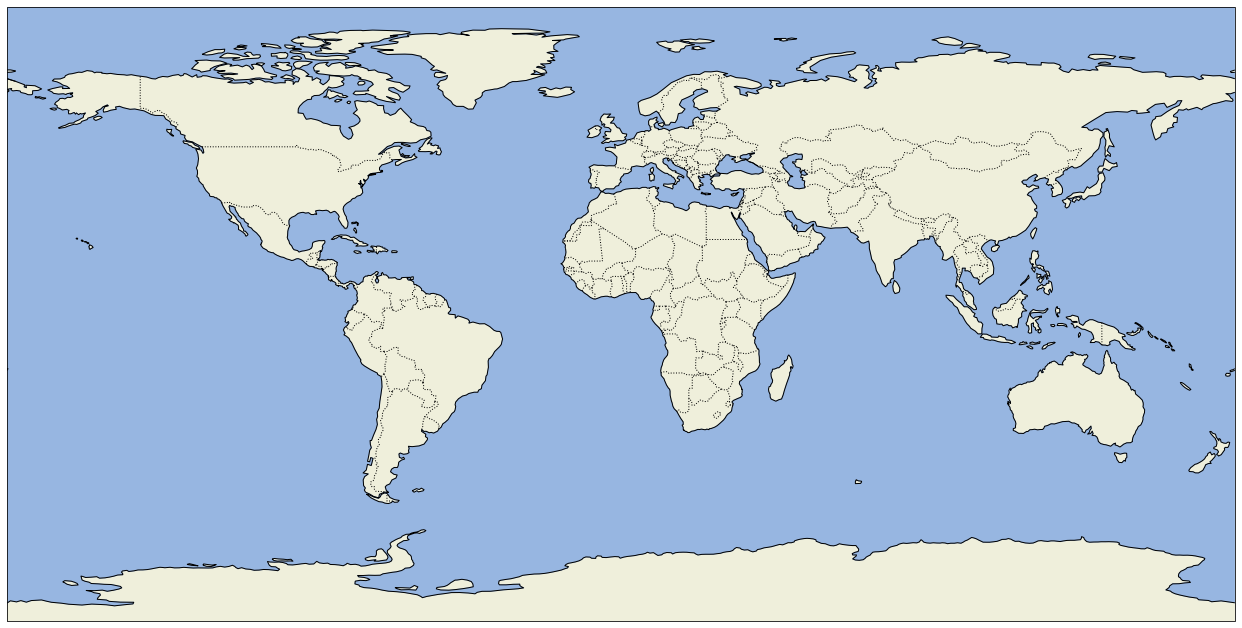

In [138]:
import cartopy.crs as ccrs
import cartopy.feature as cfeat
def make_figure():
    fig = plt.figure(figsize=(22, 12))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # generate a basemap with country borders, oceans and coastlines
    ax.add_feature(cfeat.LAND)
    ax.add_feature(cfeat.OCEAN)
    ax.add_feature(cfeat.COASTLINE)
    ax.add_feature(cfeat.BORDERS, linestyle='dotted')
    return fig, ax

make_figure();


In [139]:
area.time

<xarray.DataArray 'time' (time: 365)>
array(['2003-01-01T00:00:00.000000000', '2003-01-02T00:00:00.000000000',
       '2003-01-03T00:00:00.000000000', ..., '2003-12-29T00:00:00.000000000',
       '2003-12-30T00:00:00.000000000', '2003-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2003-01-01 2003-01-02 ... 2003-12-31
Attributes:
    long_name:           Time
    axis:                T
    standard_name:       time
    coordinate_defines:  start
    actual_range:        [902880. 911616.]
    delta_t:             0000-00-01 00:00:00
    avg_period:          0000-00-01 00:00:00

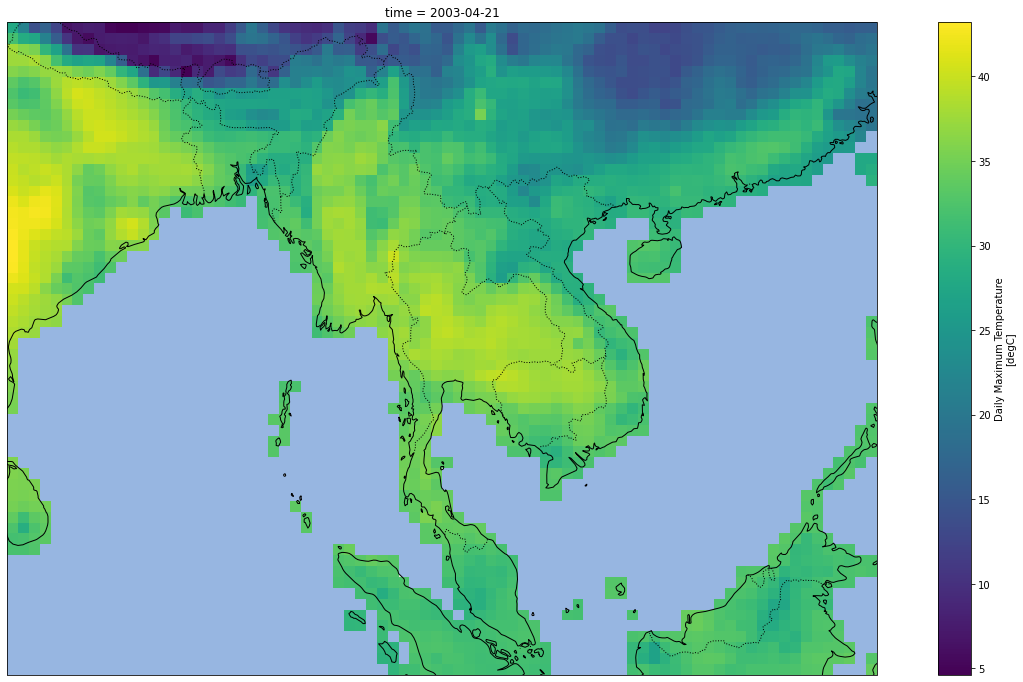

In [141]:
_, ax = make_figure()
# plot the temperature field
area.tmax[110].plot() # [ตัวเลข] ตัวเลข 0-365 คือวันในรอบปี เช่น 0 คือวันที่ 1 มกราคม วันที่ 110 คือวันที่ 21 เมษายน

## นิสิตทดลองทำ
นิสิตลองเลือกพื้นที่ให้ครอบคลุมพื้นที่ยุโรป เพื่อตรวจสอบสภาวะคลื่นความร้อนที่เกิดในช่วงต้นเดือนสิงหาคม 2003 ที่มีคนฝรั่งเศสราว 15,000 คนเสียชีวิต จาก https://en.wikipedia.org/wiki/2003_European_heat_wave
หรือนิสิตอาจสนใจ ปีอื่นๆ เช่น 2015 ที่มีคนปากีสถานเสียชีวิต 2500 คนจากเหตุการณ์คลื่นความร้อน ในช่วงเดือนมิถุนายนซึ่งอยู่ในช่วงถือศีลอด อ่าน https://en.wikipedia.org/wiki/List_of_heat_waves#2015
อย่าลืมเปลี่ยนพิกัด

#### กำหนดค่าพิกัดตรงนี้
lat_bnd = [30, 0] # 30N-0
lon_bnd = [80, 120]

และเปลี่ยนวันที่
area.tmax[110].plot() # [ตัวเลข] ตัวเลข 0-365 คือวันในรอบปี เช่น 0 คือวันที่ 1 มกราคม วันที่ 110 คือวันที่ 21 เมษายน

## การทำ mask พื้นที่ที่ต้องการด้วยการใช้ Shapefile:
ใช้สองไลบราลี่ที่สำคัญได้แก่

* Geopandas: conda install -c conda-forge geopandas   --> ใช้ในการแสดงผลและวิเคราะห์ข้อมูล GIS
* osgeo: conda install -c conda-forge gdal  --> ใช้ gdal ในการจัดการข้อมูล GIS 
ต่อไปจะทำการเปิดข้อมูล shapefile แล้วทำการอ่านเพื่อนำมาทำ mask ในแต่ละจุดกริดของข้อมูล netcdf เพื่อนำไปแสดงผลหรือวิเคราะห์ต่อไป

In [36]:
from osgeo import ogr
import geopandas as gpd
import numpy as np

# ฟังก์ชันนี้สำคัญต่อการสร้าง mask
def get_mask(lons2d, lats2d, shp_path="", polygon_name=None):
    """
    Assumes that the shape file contains polygons in lat lon coordinates
    :param lons2d:
    :param lats2d:
    :param shp_path:
    :rtype : np.ndarray
    The mask is 1 for the points inside of the polygons
    """
    ds = ogr.Open(shp_path)
    """
    :type : ogr.DataSource
    """

    xx = lons2d.copy()
    yy = lats2d

    # set longitudes to be from -180 to 180
    xx[xx > 180] -= 360

    mask = np.zeros(lons2d.shape, dtype=int)
    nx, ny = mask.shape

    pt = ogr.Geometry(ogr.wkbPoint)

    for i in range(ds.GetLayerCount()):
        layer = ds.GetLayer(i)
        """
        :type : ogr.Layer
        """

        for j in range(layer.GetFeatureCount()):
            feat = layer.GetFeature(j)
            """
            :type : ogr.Feature
            """

            # เลือกรูปปิดด้วยการใช้ name property
            if polygon_name is not None:
                if not feat.GetFieldAsString("NAME") == polygon_name:
                    continue

            g = feat.GetGeometryRef()
            """
            :type : ogr.Geometry
            """

            assert isinstance(g, ogr.Geometry)

            for pi in range(nx):
                for pj in range(ny):
                    pt.SetPoint_2D(0, float(xx[pi, pj]), float(yy[pi, pj]))

                    mask[pi, pj] += int(g.Contains(pt))

    return mask


We first read the Netcdf file and store informations in a Xarray.dataset.



In [144]:
# เลือกวันที่
ds= DS_new.sel(time='2003-04-28')
ds

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
    time     datetime64[ns] 2003-04-28
Data variables:
    tmax     (lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    version:        V1.0
    history:        created 9/2016 by CAS NOAA/ESRL PSD
    title:          CPC GLOBAL TEMP V1.0
    dataset_title:  CPC GLOBAL TEMP
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/wd52ws/global_temp/
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globaltemp...

#### สกัดค่าตามแนวละติจูดและลองติจูด เพื่อนำไปสร้างแมทริกซ์ 2 มิติ


In [38]:
Imp_Lats =  ds['lat'].values
Imp_Lons =  ds['lon'].values
lon2d, lat2d = np.meshgrid(Imp_Lons, Imp_Lats)

#### เปิดข้อมูล shape ไฟล์ด้วยไลบราลี่ Geopandas library.



In [39]:
# ดาวน์โหลด shapefile จาก https://www.naturalearthdata.com/downloads/50m-cultural-vectors/50m-admin-0-countries-2/
shapes = gpd.read_file("./1data/ne_50m_admin_0_countries.shp")
list(shapes.columns.values)

['featurecla',
 'scalerank',
 'LABELRANK',
 'SOVEREIGNT',
 'SOV_A3',
 'ADM0_DIF',
 'LEVEL',
 'TYPE',
 'ADMIN',
 'ADM0_A3',
 'GEOU_DIF',
 'GEOUNIT',
 'GU_A3',
 'SU_DIF',
 'SUBUNIT',
 'SU_A3',
 'BRK_DIFF',
 'NAME',
 'NAME_LONG',
 'BRK_A3',
 'BRK_NAME',
 'BRK_GROUP',
 'ABBREV',
 'POSTAL',
 'FORMAL_EN',
 'FORMAL_FR',
 'NAME_CIAWF',
 'NOTE_ADM0',
 'NOTE_BRK',
 'NAME_SORT',
 'NAME_ALT',
 'MAPCOLOR7',
 'MAPCOLOR8',
 'MAPCOLOR9',
 'MAPCOLOR13',
 'POP_EST',
 'POP_RANK',
 'POP_YEAR',
 'GDP_MD',
 'GDP_YEAR',
 'ECONOMY',
 'INCOME_GRP',
 'FIPS_10',
 'ISO_A2',
 'ISO_A2_EH',
 'ISO_A3',
 'ISO_A3_EH',
 'ISO_N3',
 'ISO_N3_EH',
 'UN_A3',
 'WB_A2',
 'WB_A3',
 'WOE_ID',
 'WOE_ID_EH',
 'WOE_NOTE',
 'ADM0_A3_IS',
 'ADM0_A3_US',
 'ADM0_A3_FR',
 'ADM0_A3_RU',
 'ADM0_A3_ES',
 'ADM0_A3_CN',
 'ADM0_A3_TW',
 'ADM0_A3_IN',
 'ADM0_A3_NP',
 'ADM0_A3_PK',
 'ADM0_A3_DE',
 'ADM0_A3_GB',
 'ADM0_A3_BR',
 'ADM0_A3_IL',
 'ADM0_A3_PS',
 'ADM0_A3_SA',
 'ADM0_A3_EG',
 'ADM0_A3_MA',
 'ADM0_A3_PT',
 'ADM0_A3_AR',
 'ADM0_A3_JP',


In [40]:
shapes.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,Zimbabwe,ZWE,...,None,None,None,None,None,None,None,None,None,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,Zambia,ZMB,...,None,None,None,None,None,None,None,None,None,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,Yemen,YEM,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,Vietnam,VNM,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Admin-0 country,5,3,Venezuela,VEN,0,2,Sovereign country,Venezuela,VEN,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


<AxesSubplot:>

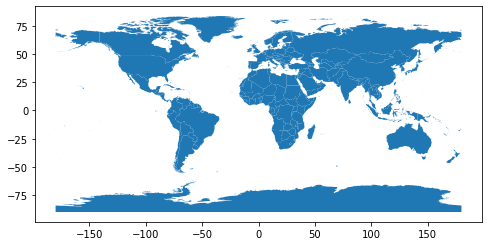

In [41]:
shapes.loc[27, 'geometry']
shapes.plot()

#### สกัดค่าข้อมูลตามกริดที่ตกอยู่ภายใต้ shapefile ประเทศไทย



In [42]:
mask=get_mask(lon2d,lat2d,shp_path="./1data/ne_50m_admin_0_countries.shp", polygon_name='Thailand') 
np.max(mask)

1

### แปลง mask ไปเป็นรูปแบบ numpy 2D array. แล้วจะนำค่าอาเรย์นี้ไปสร้าง mask ข้อมูลใน netcdf ของเรา

In [145]:
np.save('1data/Thailand.npy',mask) # บันทึก mask ไปเป็น  numpy.array

### ทำการ  mask ด้วยการใช้ .where() method.



In [44]:
ds_mask = ds.where(mask == 1) 
ds_mask.to_netcdf('1data/Thailand.nc')  # we want to save our shapefile mask in Netcdf format

In [45]:
ds_mask

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
    time     datetime64[ns] 2003-04-28
Data variables:
    tmax     (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    Conventions:    CF-1.0
    version:        V1.0
    history:        created 9/2016 by CAS NOAA/ESRL PSD
    title:          CPC GLOBAL TEMP V1.0
    dataset_title:  CPC GLOBAL TEMP
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/wd52ws/global_temp/
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globaltemp...

In [46]:
np.max(ds_mask.tmax)

<xarray.DataArray 'tmax' ()>
array(39.161236, dtype=float32)
Coordinates:
    time     datetime64[ns] 2003-04-28

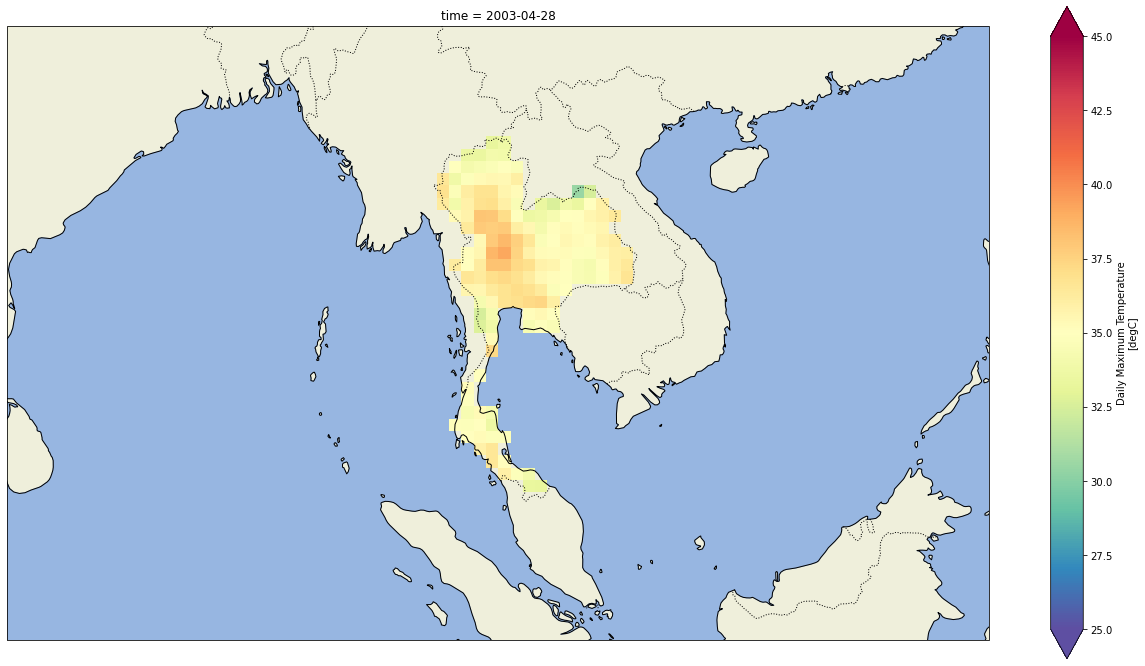

In [47]:
_, ax = make_figure()
# plot the temperature field
lat_bnd = [25, 0]
lon_bnd = [80, 120]
ds_mask.tmax.sel(lon=slice(*lon_bnd), lat=slice(*lat_bnd),).plot.pcolormesh(vmin=25, vmax=45, cmap='Spectral_r',add_colorbar=True, extend='both')